# 📊 Exploratory Data Analysis on Seaborn's Exercise Dataset

## Project Overview
**Author:** Kersha Broussard  
**Date:** February 12, 2025  
**Dataset:** Seaborn's `exercise` dataset  

### **🔍 Purpose of the Project**
This project focuses on **Exploratory Data Analysis (EDA)** using Python, Pandas, and Seaborn. The goal is to understand the relationships between different exercise activities, heart rate, and other health-related factors.

We will:
-  **Load and explore the dataset** (shape, structure, and data types)
-  **Perform initial descriptive analysis** (summary statistics, missing values)
-  **Visualize distributions of numerical and categorical variables**
-  **Examine trends and relationships between key variables**
-  **Transform data and engineer new features where necessary**
-  **Summarize findings with meaningful insights**

In [157]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [158]:
import seaborn as sns

# Reload dataset
df = sns.load_dataset("exercise")

# Print sample rows
print(df.head(10))


   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest
5           5   2  low fat     93  30 min  rest
6           6   3  low fat     97   1 min  rest
7           7   3  low fat     97  15 min  rest
8           8   3  low fat     94  30 min  rest
9           9   4  low fat     80   1 min  rest


In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **1️. Data Acquisition**
- Load the dataset using `sns.load_dataset()`
- Inspect data shape, columns, and data types

In [161]:
df = sns.load_dataset("exercise")


In [186]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset("exercise")

# Drop the "Unnamed: 0" column if it exists
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Display dataset info
print(df.head())
print(df.dtypes)



   id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest
id          int64
diet     category
pulse       int64
time     category
kind     category
dtype: object


In [188]:
# Convert "time" column to numerical values (1 min → 1, 15 min → 15, etc.)
df["time_numeric"] = df["time"].str.extract(r"(\d+)").astype(float)

# Check the transformation
print(df[["time", "time_numeric"]].head())


     time  time_numeric
0   1 min           1.0
1  15 min          15.0
2  30 min          30.0
3   1 min           1.0
4  15 min          15.0


### **2️. Initial Data Inspection**
- Display first 10 rows
- Identify missing values (if any)
- Check categorical and numerical features

In [164]:
print(df.head(10))  # Display first 10 rows
print(df.shape)      # Display dataset dimensions
print(df.dtypes)     # Show data types
print(df.describe()) # Summary statistics


   id     diet  pulse    time  kind
0   1  low fat     85   1 min  rest
1   1  low fat     85  15 min  rest
2   1  low fat     88  30 min  rest
3   2  low fat     90   1 min  rest
4   2  low fat     92  15 min  rest
5   2  low fat     93  30 min  rest
6   3  low fat     97   1 min  rest
7   3  low fat     97  15 min  rest
8   3  low fat     94  30 min  rest
9   4  low fat     80   1 min  rest
(90, 5)
id          int64
diet     category
pulse       int64
time     category
kind     category
dtype: object
              id       pulse
count  90.000000   90.000000
mean   15.500000   99.700000
std     8.703932   14.858471
min     1.000000   80.000000
25%     8.000000   90.250000
50%    15.500000   96.000000
75%    23.000000  103.000000
max    30.000000  150.000000


### **3️. Summary Statistics**
- Use `df.describe()` to understand numerical features
- Examine categorical distributions

In [166]:
# Summary statistics for numerical columns
print(df.describe())


              id       pulse
count  90.000000   90.000000
mean   15.500000   99.700000
std     8.703932   14.858471
min     1.000000   80.000000
25%     8.000000   90.250000
50%    15.500000   96.000000
75%    23.000000  103.000000
max    30.000000  150.000000


### **4️. Data Visualization**
- Histograms and count plots for distributions
- Boxplots and scatter plots for relationships
- Line charts for trend analysis

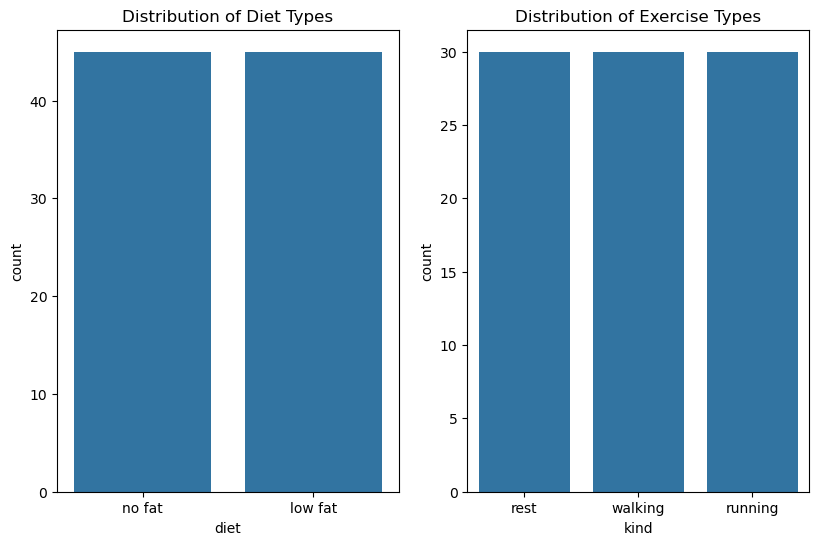

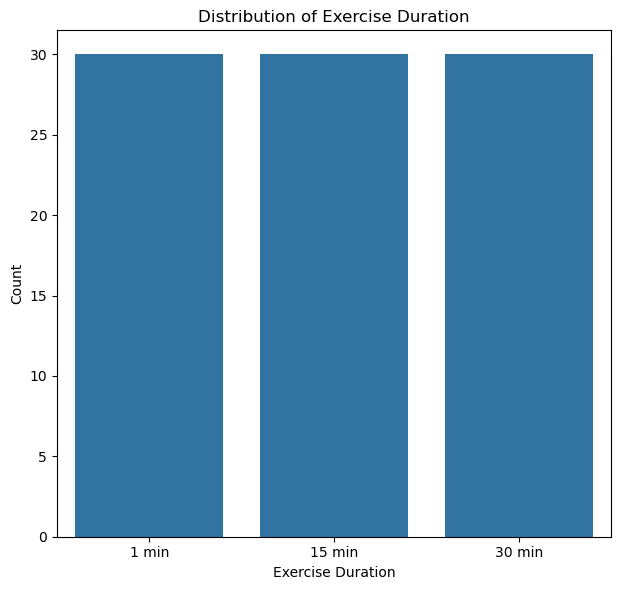

In [168]:
plt.figure(figsize=(15,6))

# Subplot 1: Distribution of Diet Types
plt.subplot(1,3,1)
sns.countplot(x="diet", data=df)
plt.title("Distribution of Diet Types")

# Subplot 2: Distribution of Exercise Types
plt.subplot(1,3,2)
sns.countplot(x="kind", data=df)
plt.title("Distribution of Exercise Types")

plt.figure(figsize=(12,6))

# Subplot 3: Distribution of Exercise Durations
plt.subplot(1,2,1)
sns.countplot(x="time", data=df, order=["1 min", "15 min", "30 min"])  # Ensuring correct order
plt.title("Distribution of Exercise Duration")
plt.xlabel("Exercise Duration")
plt.ylabel("Count")


# Adjust layout and show plots
plt.tight_layout()
plt.show()


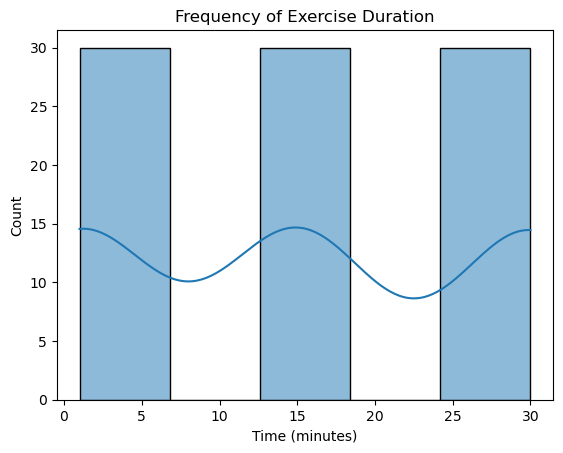

In [208]:
sns.histplot(df["time_numeric"], bins=5, kde=True)
plt.title("Frequency of Exercise Duration")
plt.xlabel("Time (minutes)")
plt.ylabel("Count")
plt.show()


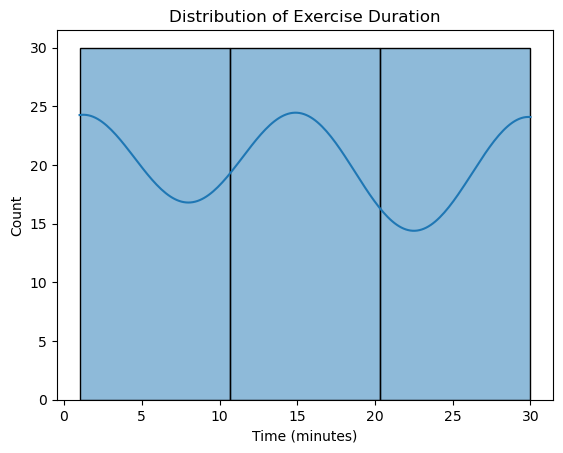

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["time_numeric"], bins=3, kde=True)
plt.xlabel("Time (minutes)")
plt.title("Distribution of Exercise Duration")
plt.show()


### **5️. Feature Engineering**
- Rename columns for better readability
- Create new features (`activity_level` based on `time`)

* Rename a column:

In [190]:
# Rename "pulse" to "heart_rate"
df.rename(columns={"pulse": "heart_rate"}, inplace=True)

# Confirm the renaming
print(df.columns)



Index(['id', 'diet', 'heart_rate', 'time', 'kind', 'time_numeric'], dtype='object')


* Add a new column:

In [192]:
# Create an "activity_level" column based on time
df["activity_level"] = df["time_numeric"].apply(lambda x: "Short" if x == 1 else ("Moderate" if x == 15 else "Long"))

# Confirm changes
print(df[["time_numeric", "activity_level"]].head())




   time_numeric activity_level
0           1.0          Short
1          15.0       Moderate
2          30.0           Long
3           1.0          Short
4          15.0       Moderate


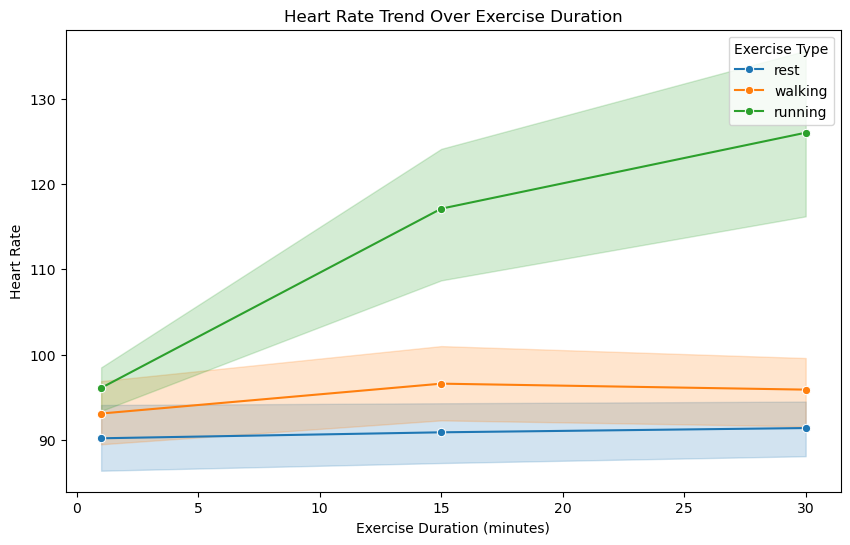

In [196]:
plt.figure(figsize=(10,6))
sns.lineplot(x="time_numeric", y="heart_rate", hue="kind", marker="o", data=df)
plt.title("Heart Rate Trend Over Exercise Duration")
plt.xlabel("Exercise Duration (minutes)")
plt.ylabel("Heart Rate")
plt.legend(title="Exercise Type")
plt.show()


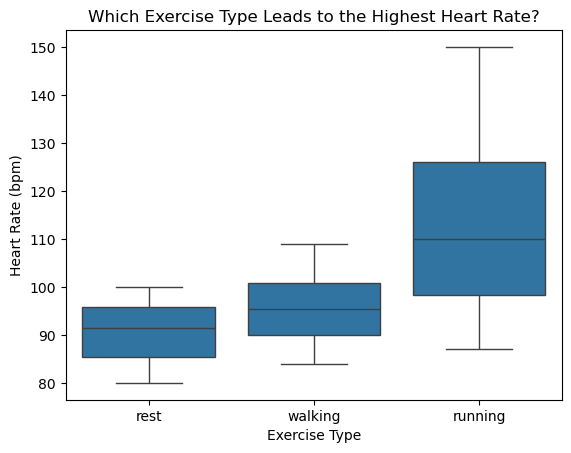

In [198]:
sns.boxplot(x="kind", y="heart_rate", data=df)
plt.title("Which Exercise Type Leads to the Highest Heart Rate?")
plt.xlabel("Exercise Type")
plt.ylabel("Heart Rate (bpm)")
plt.show()


* Relationship Between Exercise & Heart Rate

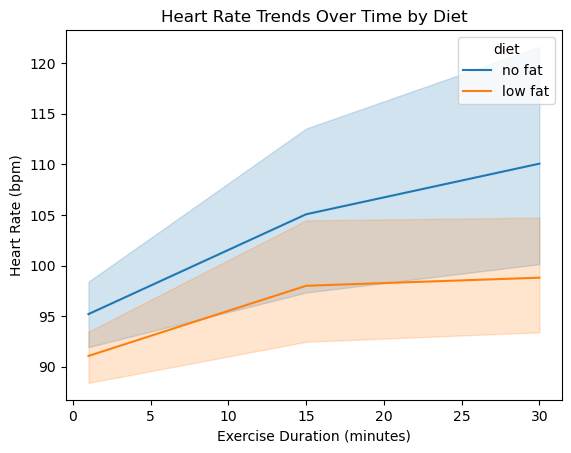

In [202]:
sns.lineplot(x="time_numeric", y="heart_rate", hue="diet", data=df)
plt.title("Heart Rate Trends Over Time by Diet")
plt.xlabel("Exercise Duration (minutes)")
plt.ylabel("Heart Rate (bpm)")
plt.show()


In [ ]:
df["time_numeric"] = df["time"].str.extract(r"(\d+)").astype(float)
print(df[["time", "time_numeric"]].head(10))


* Trend Over Time

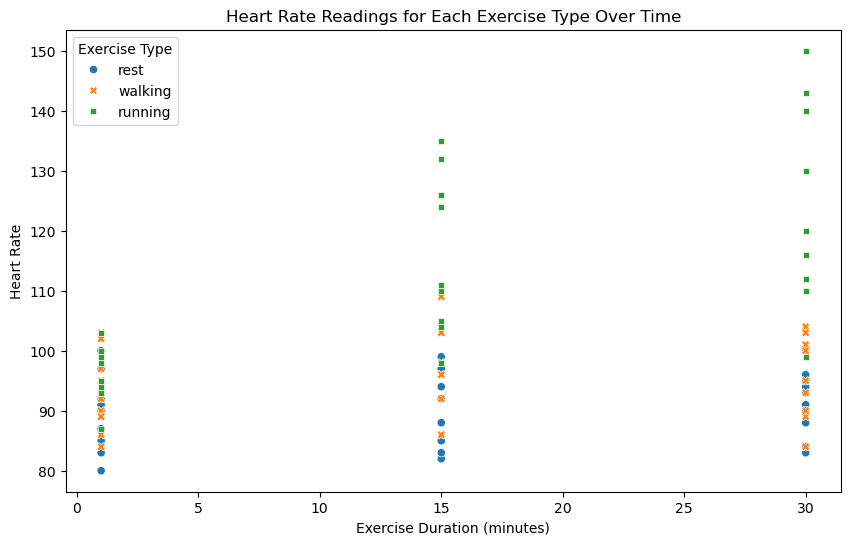

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x="time_numeric", y="heart_rate", hue="kind", style="kind", data=df)
plt.title("Heart Rate Readings for Each Exercise Type Over Time")
plt.xlabel("Exercise Duration (minutes)")
plt.ylabel("Heart Rate")
plt.legend(title="Exercise Type")
plt.show()


### **6️. Insights & Conclusions**
- Key takeaways from the data
- Observations from visualizationsns

### Key Takeaways:
- Heart rate increases with **longer** exercise durations.
- **Running** has the highest heart rate on average.
- People on a **low-fat diet** tend to have a **slightly lower** heart rate during exerciuts.


### **Why This Matters?**
Understanding exercise trends helps in making better **fitness** and **health** decisions. 
This analysis can assist in:
* Identifying patterns in heart rate during exercises  
* Observing the impact of **diet** on exercise performance  
* Understanding activity levels over time